1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
        3.1 Calculate the distance between the query example and the current example from the data.
        3.2 Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv('C://Users//Admin//Documents//Projects-master//Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = iris.iloc[:, 1:-1].values
y = iris.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)  

In [10]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [14]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 8)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix 

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[21  0  0]
 [ 0 20  2]
 [ 0  3 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.87      0.91      0.89        22
 Iris-virginica       0.88      0.82      0.85        17

       accuracy                           0.92        60
      macro avg       0.91      0.91      0.91        60
   weighted avg       0.92      0.92      0.92        60



In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

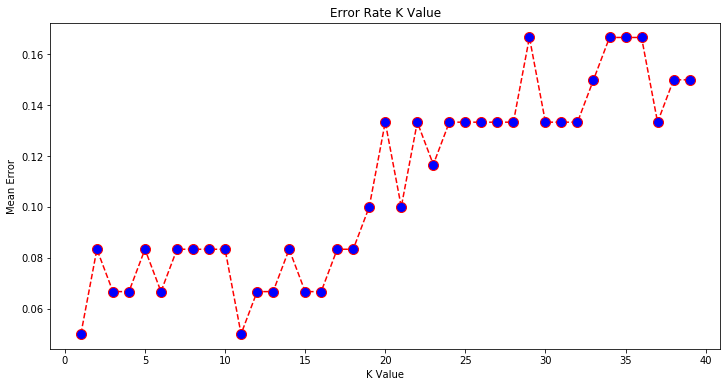

In [20]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color = 'red', linestyle = 'dashed', marker = 'o',  
         markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  